# Predicting Gang Violence

Using a data set from buzzfeed and local police departments, we will create a model based on features from the data to predict if a crime occured is gang realted or not.

## EDA

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('offenses-standardized.csv')
something = pd.read_csv('offenses-standardized.csv')

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,7,10,14,15,16,17,18,19,20,21,22,24,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,...,victim_race,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date
0,MDBPD0000-C419771020-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0351,2017-07-26,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
1,MDBPD0000-B63BECA76C-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17H0198,2017-07-26,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,BLACK,NaN,BLACK/HISPANIC,FEMALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
2,MDBPD0000-8A7079014F-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0349,2017-07-25,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
3,MDBPD0000-3EF6B5EBEF-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0348,2017-07-25,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
4,MDBPD0000-5995BFA411-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0346,2017-07-24,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN


In [4]:
df.top_local_classification.unique()

array(['NON FATAL SHOOTING', 'HOMICIDE SHOOTING', 'HOMICIDE BEATING', ...,
       'ASSAULT 2ND DEGREE INTENTIONAL INJURY TO PERSON RENDERING EMERGENCY CARE',
       'ASSAULT 2ND DEGREE INTENTIONAL INJURY TO AMBULANCE OPERATOR/NURSE/PARAMEDIC/MEDICAL DOCTOR WHILE PERFORMING WORK RELATED DUTY',
       'ASSAULT FIRST DEGREE- INTENTIONALLY DISFIGURE DESTROY AMPUTATE DISABLE'],
      dtype=object)

In [5]:
# I want to see all my columns, so I set my columns diplay options to max

pd.set_option('display.max_columns', None)

In [6]:
# We want crimes associated with gang activity, so we will be looking at the 'N' and 'Y' columns.

df.gang_activity_ind.value_counts(normalize = True)

N              0.584448
UNSPECIFIED    0.248238
Y              0.141642
UNKNOWN        0.020615
MISSING        0.003340
POS            0.000786
UNK            0.000511
UNCLEAR        0.000225
INV            0.000112
REL            0.000056
MAY            0.000011
NO0            0.000006
NOT            0.000006
NP             0.000006
Name: gang_activity_ind, dtype: float64

In [7]:
df.head()

,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,nibrs_code,weapon,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,relationship_to_offender,circumstance,inside_outside,victim_age,victim_race,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date
0,MDBPD0000-C419771020-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0351,2017-07-26,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,22,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
1,MDBPD0000-B63BECA76C-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17H0198,2017-07-26,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,53,BLACK,NaN,BLACK/HISPANIC,FEMALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
2,MDBPD0000-8A7079014F-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0349,2017-07-25,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,19,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
3,MDBPD0000-3EF6B5EBEF-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0348,2017-07-25,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,29,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
4,MDBPD0000-5995BFA411-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0346,2017-07-24,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,22,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN


In [8]:
df.family_violence_ind.value_counts(normalize = True)

N          0.915438
Y          0.080121
MISSING    0.004330
UNCLEAR    0.000111
Name: family_violence_ind, dtype: float64

In [9]:
df.isnull().sum()

row_hash                         0
source                           0
agency_name                      0
agency_ori                       0
agency_incident_id               0
occurred_date                   86
occurred_time                18564
offense_category            316594
top_ucr_classification      108303
top_local_classification     44977
nibrs_code                  710134
weapon                       51689
firearm_ind                      0
offense_group                    0
domestic_violence_ind       278195
family_violence_ind         702626
gang_activity_ind           569490
relationship_to_offender    582469
circumstance                729749
inside_outside              744816
victim_age                  469869
victim_race                 459988
victim_ethnicity            546069
victim_race_condensed            0
victim_sex                  460048
case_status                 419985
arrest_ind                   59759
clearance_status            390403
clearance_group     

In [10]:
yes = df.loc[df['gang_activity_ind'] == 'Y']

In [11]:
yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25236 entries, 274808 to 502656
Data columns (total 31 columns):
row_hash                    25236 non-null object
source                      25236 non-null object
agency_name                 25236 non-null object
agency_ori                  25236 non-null object
agency_incident_id          25236 non-null object
occurred_date               25236 non-null object
occurred_time               24824 non-null object
offense_category            25112 non-null object
top_ucr_classification      21838 non-null object
top_local_classification    24823 non-null object
nibrs_code                  287 non-null object
weapon                      24358 non-null object
firearm_ind                 25236 non-null object
offense_group               25236 non-null object
domestic_violence_ind       3922 non-null object
family_violence_ind         996 non-null object
gang_activity_ind           25236 non-null object
relationship_to_offender    3930 non-nul

In [12]:
df.head()

,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,nibrs_code,weapon,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,relationship_to_offender,circumstance,inside_outside,victim_age,victim_race,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date
0,MDBPD0000-C419771020-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0351,2017-07-26,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,22,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
1,MDBPD0000-B63BECA76C-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17H0198,2017-07-26,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,53,BLACK,NaN,BLACK/HISPANIC,FEMALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
2,MDBPD0000-8A7079014F-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0349,2017-07-25,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,19,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
3,MDBPD0000-3EF6B5EBEF-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0348,2017-07-25,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,29,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN
4,MDBPD0000-5995BFA411-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0346,2017-07-24,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,NaN,FIREARM,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,NaN,NaN,22,BLACK,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN


In [13]:
df2 = df.drop(columns = ['row_hash','arrest_date','clearance_date','clearance_group','clearance_status','case_status',
                   'victim_race_condensed','victim_ethnicity','circumstance','relationship_to_offender',
                  'weapon','nibrs_code','top_local_classification','top_ucr_classification',
                  'agency_name','agency_ori','agency_incident_id', 'occurred_time'])
df2

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747653,WILMINGTON-MAIN,2018-03-18,AGGRAVATED ASSAULT,Y,Agg Assault - Gun,N,N,NaN,NaN,NaN,NaN,NaN,N
747654,WILMINGTON-MAIN,2018-03-18,AGGRAVATED ASSAULT,Y,Agg Assault - Gun,N,N,NaN,NaN,NaN,NaN,NaN,N
747655,WILMINGTON-MAIN,2018-03-18,AGGRAVATED ASSAULT,N,Agg Assault - Other Weapon,N,N,NaN,NaN,NaN,NaN,NaN,N
747656,WILMINGTON-MAIN,2018-03-20,AGGRAVATED ASSAULT,N,Agg Assault - Other Weapon,N,N,NaN,NaN,NaN,NaN,NaN,N


In [14]:
df2.offense_category.value_counts()

AGGRAVATED ASSAULT                               160633
AGG ASSAULT                                      140043
AGG ASSAULT - OTHER WEAPON                        64534
HOMICIDE                                          20360
AGG ASSAULT - FIREARM - DISCHARGE UNSPECIFIED      8999
AGG ASSAULT - SHOOTING - NON-FATAL                 7426
MURDER                                             5609
AGG ASSAULT - SHOOTING - HIT UNSPECIFIED           5589
AGG ASSAULT - UNSPECIFIED WEAPON                   4030
NON-FATAL SHOOTING                                 3755
NON FATAL SHOOTING                                 3621
AGG ASSAULT - SHOOTING - NO HIT                    3076
HOMICIDE - CRIMINAL - SHOOTING - FATAL             1730
NON-FATAL-SHOOTING                                  908
HOMICIDE - CRIMINAL - OTHER WEAPON                  608
MURDER AND NON-NEGLIGENT MANSLAUGHTER               138
HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON              5
Name: offense_category, dtype: int64

In [15]:
df2.offense_category = df2.offense_category.replace(to_replace ='AGGRAVATED ASSAULT', value =  'AGGRAVATED_ASSAULT')

In [16]:
df2.rename(columns = {'AGGRAVATED ASSAULT': 'AGGRAVATED_ASSAULT'}, inplace = True)

In [17]:
df2.offense_category.replace(to_replace= 'AGG ASSAULT', value = 'AGGRAVATED_ASSAULT', inplace = True)

In [18]:
df2.offense_category.value_counts()

AGGRAVATED_ASSAULT                               300676
AGG ASSAULT - OTHER WEAPON                        64534
HOMICIDE                                          20360
AGG ASSAULT - FIREARM - DISCHARGE UNSPECIFIED      8999
AGG ASSAULT - SHOOTING - NON-FATAL                 7426
MURDER                                             5609
AGG ASSAULT - SHOOTING - HIT UNSPECIFIED           5589
AGG ASSAULT - UNSPECIFIED WEAPON                   4030
NON-FATAL SHOOTING                                 3755
NON FATAL SHOOTING                                 3621
AGG ASSAULT - SHOOTING - NO HIT                    3076
HOMICIDE - CRIMINAL - SHOOTING - FATAL             1730
NON-FATAL-SHOOTING                                  908
HOMICIDE - CRIMINAL - OTHER WEAPON                  608
MURDER AND NON-NEGLIGENT MANSLAUGHTER               138
HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON              5
Name: offense_category, dtype: int64

In [19]:
df2.offense_category.replace(to_replace= ['AGG ASSAULT - OTHER WEAPON','AGG ASSAULT - FIREARM - DISCHARGE UNSPECIFIED'], value = 'AGGRAVATED_ASSAULT', inplace = True)


In [20]:
df2.offense_category.value_counts()

AGGRAVATED_ASSAULT                          374209
HOMICIDE                                     20360
AGG ASSAULT - SHOOTING - NON-FATAL            7426
MURDER                                        5609
AGG ASSAULT - SHOOTING - HIT UNSPECIFIED      5589
AGG ASSAULT - UNSPECIFIED WEAPON              4030
NON-FATAL SHOOTING                            3755
NON FATAL SHOOTING                            3621
AGG ASSAULT - SHOOTING - NO HIT               3076
HOMICIDE - CRIMINAL - SHOOTING - FATAL        1730
NON-FATAL-SHOOTING                             908
HOMICIDE - CRIMINAL - OTHER WEAPON             608
MURDER AND NON-NEGLIGENT MANSLAUGHTER          138
HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON         5
Name: offense_category, dtype: int64

In [21]:
df2.offense_category.replace(to_replace= ['AGG ASSAULT - SHOOTING - NON-FATAL','AGG ASSAULT - SHOOTING - HIT UNSPECIFIED','AGG ASSAULT - UNSPECIFIED WEAPON', 'AGG ASSAULT - SHOOTING - NO HIT'], value = 'AGGRAVATED_ASSAULT', inplace = True)


In [22]:
df2.offense_category.value_counts()

AGGRAVATED_ASSAULT                          394330
HOMICIDE                                     20360
MURDER                                        5609
NON-FATAL SHOOTING                            3755
NON FATAL SHOOTING                            3621
HOMICIDE - CRIMINAL - SHOOTING - FATAL        1730
NON-FATAL-SHOOTING                             908
HOMICIDE - CRIMINAL - OTHER WEAPON             608
MURDER AND NON-NEGLIGENT MANSLAUGHTER          138
HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON         5
Name: offense_category, dtype: int64

In [23]:
df2.offense_category.dropna(inplace = True)
df2.offense_category.unique()

array(['NON FATAL SHOOTING', 'HOMICIDE', 'NON-FATAL SHOOTING', 'MURDER',
       'AGGRAVATED_ASSAULT', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER',
       'HOMICIDE - CRIMINAL - SHOOTING - FATAL',
       'HOMICIDE - CRIMINAL - OTHER WEAPON',
       'HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON', 'NON-FATAL-SHOOTING'],
      dtype=object)

In [24]:
df2.offense_category.value_counts()

AGGRAVATED_ASSAULT                          394330
HOMICIDE                                     20360
MURDER                                        5609
NON-FATAL SHOOTING                            3755
NON FATAL SHOOTING                            3621
HOMICIDE - CRIMINAL - SHOOTING - FATAL        1730
NON-FATAL-SHOOTING                             908
HOMICIDE - CRIMINAL - OTHER WEAPON             608
MURDER AND NON-NEGLIGENT MANSLAUGHTER          138
HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON         5
Name: offense_category, dtype: int64

In [25]:
df2.offense_category.unique()

array(['NON FATAL SHOOTING', 'HOMICIDE', 'NON-FATAL SHOOTING', 'MURDER',
       'AGGRAVATED_ASSAULT', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER',
       'HOMICIDE - CRIMINAL - SHOOTING - FATAL',
       'HOMICIDE - CRIMINAL - OTHER WEAPON',
       'HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON', 'NON-FATAL-SHOOTING'],
      dtype=object)

In [26]:
df2.offense_category.replace(to_replace= ['NON-FATAL SHOOTING','NON FATAL SHOOTING','NON-FATAL-SHOOTING'], value = 'NON_FATAL_SHOOTING', inplace = True)

In [27]:
df2.offense_category.replace(to_replace= ['MURDER','HOMICIDE - CRIMINAL - SHOOTING - FATAL','HOMICIDE - CRIMINAL - OTHER WEAPON','MURDER AND NON-NEGLIGENT MANSLAUGHTER','HOMICIDE - CRIMINAL - UNSPECIFIED WEAPON'], value = 'HOMICIDE', inplace = True)

In [28]:
df2.head()

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN


In [29]:
df2.firearm_ind.unique()

array(['Y', 'N', 'UNCLEAR', 'MISSING', 'UNKNOWN', 'UNSPECIFIED'],
      dtype=object)

In [30]:
df2.firearm_ind.replace(to_replace= ['UNCLEAR','MISSING','UNKNOWN', 'UNSPECIFIED'], value = 'OTHER', inplace = True)

In [31]:
df2.offense_group.unique()

array(['Non-Fatal Shooting', 'Homicide - Gun', 'Homicide - Other Weapon',
       'Homicide - Weapon Unspecified', 'Agg Assault - Gun',
       'Agg Assault - Other Weapon', 'Agg Assault - Weapon Unspecified'],
      dtype=object)

In [32]:
df2.offense_group.replace(to_replace= ['Homicide - Gun','Homicide - Other Weapon','Homicide - Weapon Unspecified'], value = 'Homicide', inplace = True)

In [33]:
df2.offense_group.replace(to_replace= ['Agg Assault - Gun','Agg Assault - Other Weapon','Agg Assault - Weapon Unspecified'], value = 'Assault', inplace = True)

In [34]:
df2.domestic_violence_ind.unique()

array([nan, 'MISSING-JOIN', 'N', 'Y', 'MISSING', 'UNCLEAR'], dtype=object)

In [35]:
df2.domestic_violence_ind.dropna(inplace= True)

In [36]:
df2.domestic_violence_ind.unique()

array(['MISSING-JOIN', 'N', 'Y', 'MISSING', 'UNCLEAR'], dtype=object)

In [37]:
df2.offense_group.replace(to_replace= ['MISSING-JOIN','MISSING', 'UNCLEAR'], value = 'DROP', inplace = True)

In [38]:
df2.domestic_violence_ind.value_counts()
#Need to figure out how to drop Labels other than 'N' and 'Y'

N               369322
Y                98072
UNCLEAR           1450
MISSING            562
MISSING-JOIN        57
Name: domestic_violence_ind, dtype: int64

In [47]:
df2.domestic_violence_ind.replace(to_replace= ['MISSING-JOIN','MISSING', 'UNCLEAR'], value = 'combine', inplace = True)

In [40]:
df2.domestic_violence_ind.value_counts()

N          369322
Y           98072
combine      2069
Name: domestic_violence_ind, dtype: int64

In [41]:
df2.head()

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN


In [43]:
df2.reset_index(inplace = True)

In [48]:
indexnames = df2[df2['domestic_violence_ind'] == 'combine']

In [49]:
indexnames = indexnames.index

In [50]:
df2.domestic_violence_ind.value_counts()

N          369322
Y           98072
combine      2069
Name: domestic_violence_ind, dtype: int64

In [51]:
df2.drop(indexnames, inplace = True)

In [52]:
df2.domestic_violence_ind.dropna(inplace = True)

In [53]:
df2.domestic_violence_ind.unique()

array(['N', 'Y'], dtype=object)

In [54]:
df2.domestic_violence_ind.value_counts()

N    369322
Y     98072
Name: domestic_violence_ind, dtype: int64

In [55]:
df2.family_violence_ind.value_counts()

N          41224
Y           3608
MISSING      195
UNCLEAR        5
Name: family_violence_ind, dtype: int64

In [56]:
df2.family_violence_ind.replace(to_replace= ['MISSING', 'UNCLEAR'], value = 'combine', inplace = True)

In [57]:
df2.family_violence_ind.value_counts()

N          41224
Y           3608
combine      200
Name: family_violence_ind, dtype: int64

In [58]:
df2.family_violence_ind.unique()

array([nan, 'N', 'combine', 'Y'], dtype=object)

In [59]:
df2.family_violence_ind.dropna(inplace = True)

In [60]:
df2.family_violence_ind.unique() 

array(['N', 'combine', 'Y'], dtype=object)

In [193]:
df2.reset_index(drop = True, inplace = True)

In [63]:
combinenames = df2[df2['family_violence_ind'] == 'combine'].index

In [194]:
df2.gang_activity_ind.unique()

array([nan, 'N', 'combine', 'Y'], dtype=object)

In [195]:
df2.gang_activity_ind.replace(to_replace= ['INV', 'POS', 'UNK', 'REL', 'NOT','NP', 'MAY', 'NO0', 'UNCLEAR', 'MISSING', 'UNKNOWN','UNSPECIFIED'], value = 'combine', inplace = True)

In [196]:
df2.gang_activity_ind.value_counts()

N          103956
combine     48798
Y           25226
Name: gang_activity_ind, dtype: int64

In [197]:
indexnames = df2[df2['gang_activity_ind'] == 'combine'].index

In [198]:
df2.gang_activity_ind.drop(indexnames, inplace = True)

In [199]:
df2.gang_activity_ind.dropna(inplace = True)

In [200]:
df2.gang_activity_ind.unique()

array(['N', 'Y'], dtype=object)

In [71]:
df2.gang_activity_ind.value_counts()

N    104130
Y     25236
Name: gang_activity_ind, dtype: int64

In [207]:
df2.head()

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN


In [73]:
df2.inside_outside.unique()

array([nan, 'OUTSIDE', 'INSIDE', 'MISSING'], dtype=object)

In [74]:
df2.inside_outside.dropna(inplace = True)

In [81]:
df2.inside_outside.replace(to_replace= ['MISSING-JOIN', 'MISSING', 'UNKNOWN', 'AMBIGUOUS'], value = 'combine', inplace = True)

In [82]:
df2.inside_outside.value_counts()

OUTSIDE    1652
INSIDE      573
combine      10
Name: inside_outside, dtype: int64

In [83]:
df2.reset_index(drop = True, inplace = True)

In [84]:
indexnames = df2[df2['inside_outside'] == 'combine'].index

In [86]:
df2.drop(indexnames, inplace = True)

In [87]:
df2.inside_outside.value_counts()

OUTSIDE    1652
INSIDE      573
Name: inside_outside, dtype: int64

In [121]:
df2.victim_age.unique() #Have to figure out what to do with some of the weird ages that are over 100 or in 90s and 'UNDER 18' value

array([22.0, 53.0, 19.0, 29.0, 36.0, 23.0, nan, 32.0, 25.0, 39.0, 40.0,
       30.0, 48.0, 33.0, 15.0, 20.0, 34.0, 26.0, 18.0, 24.0, 17.0, 28.0,
       27.0, 42.0, 52.0, 54.0, 21.0, 41.0, 38.0, 35.0, 16.0, 13.0, 55.0,
       31.0, 45.0, 10.0, 51.0, 66.0, 37.0, 44.0, 46.0, 59.0, 67.0, 2.0,
       49.0, 90.0, 14.0, 64.0, 58.0, 50.0, 47.0, 43.0, 0.0, 57.0, 68.0,
       3.0, 4.0, 8.0, 62.0, 61.0, 6.0, 56.0, 60.0, 12.0, 82.0, 11.0, 9.0,
       93.0, 85.0, 65.0, 70.0, 72.0, 63.0, 79.0, 83.0, 73.0, 1.0, 69.0,
       91.0, 71.0, 7.0, 84.0, 86.0, 80.0, 5.0, 76.0, 88.0, 74.0, 77.0,
       78.0, 75.0, 81.0, 89.0, 87.0, 94.0, 96.0, 92.0, 98.0, 97.0, 105.0,
       95.0, 114.0, 115.0, 215.0, 116.0, 217.0, 99.0, '51', '31', '23',
       '32', '66', '17', '48', '34', '63', '20', '52', '25', '26', '72',
       '39', '64', '47', '18', '61', '28', '44', '38', '94', '19', '36',
       '50', '55', '22', '33', '24', '27', '53', '37', '46', '59', '15',
       '29', '35', '65', '43', '12', '45', '41', '21', '

In [122]:
df2.victim_age.dropna(inplace = True)

In [123]:
df2.victim_age.unique()

array([22.0, 53.0, 19.0, 29.0, 36.0, 23.0, 32.0, 25.0, 39.0, 40.0, 30.0,
       48.0, 33.0, 15.0, 20.0, 34.0, 26.0, 18.0, 24.0, 17.0, 28.0, 27.0,
       42.0, 52.0, 54.0, 21.0, 41.0, 38.0, 35.0, 16.0, 13.0, 55.0, 31.0,
       45.0, 10.0, 51.0, 66.0, 37.0, 44.0, 46.0, 59.0, 67.0, 2.0, 49.0,
       90.0, 14.0, 64.0, 58.0, 50.0, 47.0, 43.0, 0.0, 57.0, 68.0, 3.0,
       4.0, 8.0, 62.0, 61.0, 6.0, 56.0, 60.0, 12.0, 82.0, 11.0, 9.0, 93.0,
       85.0, 65.0, 70.0, 72.0, 63.0, 79.0, 83.0, 73.0, 1.0, 69.0, 91.0,
       71.0, 7.0, 84.0, 86.0, 80.0, 5.0, 76.0, 88.0, 74.0, 77.0, 78.0,
       75.0, 81.0, 89.0, 87.0, 94.0, 96.0, 92.0, 98.0, 97.0, 105.0, 95.0,
       114.0, 115.0, 215.0, 116.0, 217.0, 99.0, '51', '31', '23', '32',
       '66', '17', '48', '34', '63', '20', '52', '25', '26', '72', '39',
       '64', '47', '18', '61', '28', '44', '38', '94', '19', '36', '50',
       '55', '22', '33', '24', '27', '53', '37', '46', '59', '15', '29',
       '35', '65', '43', '12', '45', '41', '21', '30', 

In [142]:
df2.victim_age.replace(to_replace= ['UNDER 18',114.0, 115.0, 215.0, 116.0, 217.0,105.0, 109.0,
                                   193.0, 100.0,'0', 0.0], value = 'combine', inplace = True)

In [143]:
df2.victim_age.unique()

array([22.0, 53.0, 19.0, 29.0, 36.0, 23.0, nan, 32.0, 25.0, 39.0, 40.0,
       30.0, 48.0, 33.0, 15.0, 20.0, 34.0, 26.0, 18.0, 24.0, 17.0, 28.0,
       27.0, 42.0, 52.0, 54.0, 21.0, 41.0, 38.0, 35.0, 16.0, 13.0, 55.0,
       31.0, 45.0, 10.0, 51.0, 66.0, 37.0, 44.0, 46.0, 59.0, 67.0, 2.0,
       49.0, 90.0, 14.0, 64.0, 58.0, 50.0, 47.0, 43.0, 'combine', 57.0,
       68.0, 3.0, 4.0, 8.0, 62.0, 61.0, 6.0, 56.0, 60.0, 12.0, 82.0, 11.0,
       9.0, 93.0, 85.0, 65.0, 70.0, 72.0, 63.0, 79.0, 83.0, 73.0, 1.0,
       69.0, 91.0, 71.0, 7.0, 84.0, 86.0, 80.0, 5.0, 76.0, 88.0, 74.0,
       77.0, 78.0, 75.0, 81.0, 89.0, 87.0, 94.0, 96.0, 92.0, 98.0, 97.0,
       95.0, 99.0, '51', '31', '23', '32', '66', '17', '48', '34', '63',
       '20', '52', '25', '26', '72', '39', '64', '47', '18', '61', '28',
       '44', '38', '94', '19', '36', '50', '55', '22', '33', '24', '27',
       '53', '37', '46', '59', '15', '29', '35', '65', '43', '12', '45',
       '41', '21', '30', '42', '75', '14', '95', '57', '

In [144]:
df2.reset_index(drop = True, inplace = True)

In [145]:
ages = df2[df2['victim_age'] == 'combine'].index

In [146]:
df2.drop(ages, inplace = True)

In [148]:
df2.victim_age.dropna(inplace = True)

In [149]:
df2.victim_age.unique()

array([22.0, 53.0, 19.0, 29.0, 36.0, 23.0, 32.0, 25.0, 39.0, 40.0, 30.0,
       48.0, 33.0, 15.0, 20.0, 34.0, 26.0, 18.0, 24.0, 17.0, 28.0, 27.0,
       42.0, 52.0, 54.0, 21.0, 41.0, 38.0, 35.0, 16.0, 13.0, 55.0, 31.0,
       45.0, 10.0, 51.0, 66.0, 37.0, 44.0, 46.0, 59.0, 67.0, 2.0, 49.0,
       90.0, 14.0, 64.0, 58.0, 50.0, 47.0, 43.0, 57.0, 68.0, 3.0, 4.0,
       8.0, 62.0, 61.0, 6.0, 56.0, 60.0, 12.0, 82.0, 11.0, 9.0, 93.0,
       85.0, 65.0, 70.0, 72.0, 63.0, 79.0, 83.0, 73.0, 1.0, 69.0, 91.0,
       71.0, 7.0, 84.0, 86.0, 80.0, 5.0, 76.0, 88.0, 74.0, 77.0, 78.0,
       75.0, 81.0, 89.0, 87.0, 94.0, 96.0, 92.0, 98.0, 97.0, 95.0, 99.0,
       '51', '31', '23', '32', '66', '17', '48', '34', '63', '20', '52',
       '25', '26', '72', '39', '64', '47', '18', '61', '28', '44', '38',
       '94', '19', '36', '50', '55', '22', '33', '24', '27', '53', '37',
       '46', '59', '15', '29', '35', '65', '43', '12', '45', '41', '21',
       '30', '42', '75', '14', '95', '57', '40', '16', '49',

In [150]:
df2.victim_race.dropna(inplace = True)

In [151]:
df2.victim_race.unique()

array(['BLACK', 'WHITE', 'HISPANIC', 'UNKNOWN', 'ASIAN', 'OTHER', 'W',
       'B', 'H', 'A', 'BLACK NON-HISPANIC', 'WHITE NON-HISPANIC',
       'BLACK HISPANIC', 'WHITE HISPANIC', 'ASIAN PACIFIC ISLANDER',
       'BLACK-HISPANIC', 'INDIAN', 'O', 'AMRICN INDIAN/ALSKN NTV',
       'ASIAN/PACIFIC ISLANDER', 'LATIN/HISPANIC',
       'AMERICAN INDIAN/NATIVE AMERICAN', 'MIDDLE EASTERN',
       'NATIVE HAWAIIAN OR PACIFIC ISLANDER', 'U', 'MISSING', 'I', 'P',
       'OTHER ASIAN', 'NATIVE AMERICAN', 'LAOTIAN', 'HAWAIIAN',
       'PACIFIC ISLANDER', 'ASIAN OR PACIFIC ISLANDER', 'M', 'IB',
       'ASIAN/PAC.ISL', 'FILIPINO', 'KOREAN', 'VIETNAMESE', 'SAMOAN',
       'CHINESE', 'CAMBODIAN', 'JAPANESE', 'ASIAN INDIAN', 'GUAMANIAN',
       'OTH'], dtype=object)

In [152]:
df2.victim_race.replace(to_replace= ['B', 'BLACK NON-HISPANIC', 'BLACK-HISPANIC', 'BLACK HISPANIC', ], value = 'BLACK', inplace = True)

In [29]:
df2.victim_race.replace(to_replace= ['ASIAN PACIFIC ISLANDER', 'INDIAN', 'ASIAN/PACIFIC ISLANDER', 'MIDDLE EASTERN','NATIVE HAWAIIAN OR PACIFIC ISLANDER','OTHER ASIAN', 'LAOTIAN', 'HAWAIIAN', 'PACIFIC ISLANDER', 'ASIAN OR PACIFIC ISLANDER','ASIAN/PAC.ISL', 'FILIPINO', 'KOREAN', 'VIETNAMESE',
       'SAMOAN', 'CHINESE', 'CAMBODIAN', 'JAPANESE', 'ASIAN INDIAN',
       'GUAMANIAN'  ], value = 'ASIAN', inplace = True)

In [30]:
df2.victim_race.replace(to_replace= ['W', 'WHITE NON-HISPANIC'], value = 'WHITE', inplace = True)

In [31]:
df2.victim_race.replace(to_replace= ['LATIN/HISPANIC', 'WHITE HISPANIC'], value = 'HISPANIC', inplace = True)

In [32]:
df2.victim_race.replace(to_replace= ['UNKNOWN', 'A', 'I', 'H', 'U', 'O', 'AMRICN INDIAN/ALSKN NTV',
       'AMERICAN INDIAN/NATIVE AMERICAN', 'MISSING', 'P',
       'NATIVE AMERICAN', 'UNDER 18', 'M', 'IB', 'OTH'], value = 'OTHER', inplace = True)

In [21]:
df4.value_counts()

M         62701
F         39042
MALE      15782
FEMALE     5882
OTHER        87
Name: victim_sex, dtype: int64

In [157]:
df2.victim_race.value_counts()

BLACK       130700
WHITE        72632
HISPANIC     64991
OTHER        10218
ASIAN         4327
Name: victim_race, dtype: int64

In [159]:
df2.victim_sex.unique()

array(['MALE', 'FEMALE', 'OTHER', 'M', 'F'], dtype=object)

In [160]:
df2.victim_sex.dropna(inplace = True)

In [33]:
df2.victim_sex.replace(to_replace= ['M'], value = 'MALE', inplace = True)

In [34]:
df2.victim_sex.replace(to_replace= ['F'], value = 'FEMALE', inplace = True)

In [35]:
df2.victim_sex.replace(to_replace= ['TRANSGENDERED', 'UNCLEAR', 'UNKNOWN', 'UNK',
       'TEST', 'U', 'X', 'H', 'UNDER 18', 'M ', 'MISSING', 'OTH'], value = 'OTHER', inplace = True)

In [164]:
df2.reset_index(drop = True, inplace = True)

In [39]:
indexnames = df2[df2['victim_sex'] == 'OTHER'].index

In [40]:
df2.victim_sex.drop(indexnames, inplace = True)

In [170]:
df2.victim_sex.value_counts()

MALE      184649
FEMALE     97434
Name: victim_sex, dtype: int64

In [171]:
#delete unclear
df2.arrest_ind.unique() #delete unclear

array([nan, 'N', 'Y', 'UNCLEAR'], dtype=object)

In [172]:
df2.arrest_ind.replace(to_replace= ['MISSING', 'UNKNOWN'], value = 'UNCLEAR', inplace = True)

In [173]:
df2.reset_index(drop = True, inplace = True)

In [174]:
indexnames = df2[df2['arrest_ind'] == 'UNCLEAR'].index

In [175]:
df2.arrest_ind.drop(indexnames, inplace = True)

In [176]:
df2.arrest_ind.dropna(inplace = True)

In [177]:
df2.arrest_ind.value_counts()

N    453795
Y    228430
Name: arrest_ind, dtype: int64

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741310 entries, 0 to 741309
Data columns (total 15 columns):
level_0                  741310 non-null int64
index                    741310 non-null int64
source                   741310 non-null object
occurred_date            741231 non-null object
offense_category         425185 non-null object
firearm_ind              741310 non-null object
offense_group            741310 non-null object
domestic_violence_ind    463659 non-null object
family_violence_ind      44498 non-null object
gang_activity_ind        177980 non-null object
inside_outside           2206 non-null object
victim_age               272892 non-null object
victim_race              282868 non-null object
victim_sex               282807 non-null object
arrest_ind               682268 non-null object
dtypes: int64(2), object(13)
memory usage: 84.4+ MB


In [179]:
df2.head()

,level_0,index,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,0,0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,1,1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,2,2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,3,3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,4,4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN


In [181]:
df2.drop(columns = ['level_0','index'], inplace = True)

In [201]:
df2.head()

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN


In [188]:
df2.gang_activity_ind.dropna(axis = 0, inplace = True)

In [203]:
df2.gang_activity_ind.value_counts()

N    103956
Y     25226
Name: gang_activity_ind, dtype: int64

In [204]:
df2.head()

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
0,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN
1,BALTIMORE-MAIN,2017-07-26,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,53,BLACK,FEMALE,NaN
2,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,19,BLACK,MALE,NaN
3,BALTIMORE-MAIN,2017-07-25,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,29,BLACK,MALE,NaN
4,BALTIMORE-MAIN,2017-07-24,NON FATAL SHOOTING,Y,Non-Fatal Shooting,NaN,NaN,NaN,NaN,22,BLACK,MALE,NaN


In [311]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741310 entries, 0 to 741309
Data columns (total 13 columns):
source                   741310 non-null object
occurred_date            741231 non-null object
offense_category         425185 non-null object
firearm_ind              741310 non-null object
offense_group            741310 non-null object
domestic_violence_ind    463659 non-null object
family_violence_ind      44498 non-null object
gang_activity_ind        129182 non-null object
inside_outside           2206 non-null object
victim_age               272892 non-null object
victim_race              282868 non-null object
victim_sex               282807 non-null object
arrest_ind               682268 non-null object
dtypes: object(13)
memory usage: 73.5+ MB


In [226]:
df3.gang_activity_ind = df2.gang_activity_ind.dropna(axis = 0)
df3.source = df2.source.dropna(axis = 0)
df3.occurred_date = df2.occurred_date.dropna(axis = 0)
df3.offense_category = df2.offense_category.dropna(axis = 0)
df3.firearm_ind = df2.firearm_ind.dropna(axis = 0)
df3.offense_group = df2.offense_group.dropna(axis = 0)
df3.domestic_violence_ind = df2.domestic_violence_ind.dropna(axis=0)
df3.family_violence_ind = df2.family_violence_ind.dropna(axis=0)
df3.inside_outside = df2.inside_outside.dropna(axis=0)
df3.victim_age = df2.victim_age.dropna(axis=0)
df3.victim_race = df2.victim_race.dropna(axis=0)
df3.victim_sex = df2.victim_sex.dropna(axis=0)
df3.arrest_ind = df2.arrest_ind.dropna(axis=0)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
df3.victim_race.value_counts()

BLACK       56925
WHITE       34115
HISPANIC    27544
OTHER        3977
ASIAN         933
Name: victim_race, dtype: int64

In [41]:
df3.victim_sex.value_counts()

MALE      78483
FEMALE    44924
Name: victim_sex, dtype: int64

In [227]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129182 entries, 274139 to 498333
Data columns (total 13 columns):
source                   129182 non-null object
occurred_date            129180 non-null object
offense_category         128275 non-null object
firearm_ind              129182 non-null object
offense_group            129182 non-null object
domestic_violence_ind    64874 non-null object
family_violence_ind      9764 non-null object
gang_activity_ind        129182 non-null object
inside_outside           502 non-null object
victim_age               124444 non-null object
victim_race              128918 non-null object
victim_sex               128964 non-null object
arrest_ind               78683 non-null object
dtypes: object(13)
memory usage: 13.8+ MB


In [228]:
df3.head()

,source,occurred_date,offense_category,firearm_ind,offense_group,domestic_violence_ind,family_violence_ind,gang_activity_ind,inside_outside,victim_age,victim_race,victim_sex,arrest_ind
274139,CHICAGO-HOM,2003-03-07,HOMICIDE,N,Homicide,NaN,NaN,N,NaN,48,WHITE HISPANIC,MALE,Y
274140,CHICAGO-HOM,2002-12-05,HOMICIDE,N,Homicide,NaN,NaN,N,NaN,24,BLACK,MALE,Y
274141,CHICAGO-HOM,2011-03-26,HOMICIDE,N,Homicide,NaN,NaN,N,NaN,50,WHITE HISPANIC,MALE,Y
274142,CHICAGO-HOM,2003-12-31,HOMICIDE,Y,Homicide,NaN,NaN,N,NaN,41,BLACK,MALE,Y
274144,CHICAGO-HOM,2010-01-22,HOMICIDE,Y,Homicide,NaN,NaN,N,NaN,18,BLACK,MALE,N


In [231]:
df3.drop(columns = ['inside_outside','arrest_ind', 'family_violence_ind'], inplace = True)

KeyError: "['inside_outside'] not found in axis"

In [233]:
df3.drop(columns = ['arrest_ind', 'family_violence_ind'], inplace = True)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [236]:
df3.drop(columns = ['domestic_violence_ind'], inplace = True)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [237]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129182 entries, 274139 to 498333
Data columns (total 9 columns):
source               129182 non-null object
occurred_date        129180 non-null object
offense_category     128275 non-null object
firearm_ind          129182 non-null object
offense_group        129182 non-null object
gang_activity_ind    129182 non-null object
victim_age           124444 non-null object
victim_race          128918 non-null object
victim_sex           128964 non-null object
dtypes: object(9)
memory usage: 9.9+ MB


In [314]:
df3.to_pickle('./final_df3.pkl')

In [3]:
df3=pd.read_pickle('./final_df3.pkl')

In [5]:
df4 = df3

In [6]:
df4.victim_age.dropna(inplace = True)

In [7]:
df4.isnull().sum()

source               0
occurred_date        0
offense_category     0
firearm_ind          0
offense_group        0
gang_activity_ind    0
victim_age           0
victim_race          0
victim_sex           0
dtype: int64

In [8]:
df4.dropna(inplace = True)

In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123494 entries, 274139 to 498333
Data columns (total 9 columns):
source               123494 non-null object
occurred_date        123494 non-null object
offense_category     123494 non-null object
firearm_ind          123494 non-null object
offense_group        123494 non-null object
gang_activity_ind    123494 non-null object
victim_age           123494 non-null float64
victim_race          123494 non-null object
victim_sex           123494 non-null object
dtypes: float64(1), object(8)
memory usage: 9.4+ MB


In [10]:
df4.victim_age = df4.victim_age.astype(float)

In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123494 entries, 274139 to 498333
Data columns (total 9 columns):
source               123494 non-null object
occurred_date        123494 non-null object
offense_category     123494 non-null object
firearm_ind          123494 non-null object
offense_group        123494 non-null object
gang_activity_ind    123494 non-null object
victim_age           123494 non-null float64
victim_race          123494 non-null object
victim_sex           123494 non-null object
dtypes: float64(1), object(8)
memory usage: 9.4+ MB


In [13]:
cat_var = df4.select_dtypes(include='object')
num_var = df4.select_dtypes(exclude = 'object')

cat_var.drop(columns=['gang_activity_ind'], inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df4.drop(columns=['gang_activity_ind']), df4.gang_activity_ind, test_size=0.2, random_state=42)
ohc = OneHotEncoder()

array_to_df = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()
encoded=pd.DataFrame(array_to_df, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(98795, 5976)

In [279]:
import pdb

In [14]:
def resamplingDataPrep(X_train, y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [15]:
resamplingDataPrep(clean_X_train, y_train, 'gang_activity_ind')

majority_class: 0
minority_class: 0


(Empty DataFrame
 Columns: [victim_age, source_CHICAGO-HOM, source_COLORADO-SPRINGS-MAIN, source_DALLAS-AGG, source_HOUSTON-AGG, source_HOUSTON-HOM, source_LOS-ANGELES-MAIN, source_NEW-YORK-CITY-HOM, source_NEWARK-HOM, occurred_date_1988-09-16, occurred_date_1995-08-07, occurred_date_1998-12-15, occurred_date_1999-10-14, occurred_date_2001-01-01, occurred_date_2001-01-05, occurred_date_2001-01-06, occurred_date_2001-01-07, occurred_date_2001-01-09, occurred_date_2001-01-10, occurred_date_2001-01-11, occurred_date_2001-01-12, occurred_date_2001-01-13, occurred_date_2001-01-14, occurred_date_2001-01-15, occurred_date_2001-01-16, occurred_date_2001-01-19, occurred_date_2001-01-21, occurred_date_2001-01-26, occurred_date_2001-01-27, occurred_date_2001-01-28, occurred_date_2001-01-31, occurred_date_2001-02-01, occurred_date_2001-02-03, occurred_date_2001-02-05, occurred_date_2001-02-09, occurred_date_2001-02-10, occurred_date_2001-02-11, occurred_date_2001-02-12, occurred_date_2001-02-14, o

In [16]:

def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [50]:
sm = SMOTE(random_state=23, sampling_strategy=1.0)
X_train_sm, y_train_sm = sm.fit_resample(clean_X_train, y_train)
print(len(X_train_sm), len(y_train_sm))

158670 158670


In [27]:
df4.victim_race.value_counts()

B                                      29124
BLACK                                  27729
HISPANIC                               24422
W                                      22132
WHITE                                  11983
OTHER                                   1883
LATIN/HISPANIC                          1678
WHITE HISPANIC                          1444
A                                        977
ASIAN OR PACIFIC ISLANDER                655
P                                        624
UNKNOWN                                  353
ASIAN/PACIFIC ISLANDER                    81
MIDDLE EASTERN                            79
U                                         70
ASIAN                                     45
BLACK HISPANIC                            44
ASIAN PACIFIC ISLANDER                    42
AMRICN INDIAN/ALSKN NTV                   36
I                                         33
BLACK-HISPANIC                            28
ASIAN/PAC.ISL                             22
INDIAN    

In [17]:
upsample_SMOTE(clean_X_train, y_train, ratio=1.0)

158670 158670


(        victim_age  source_CHICAGO-HOM  source_COLORADO-SPRINGS-MAIN  \
 0        19.000000                 0.0                           0.0   
 1        25.000000                 0.0                           0.0   
 2        26.000000                 0.0                           1.0   
 3        48.000000                 0.0                           0.0   
 4        27.000000                 0.0                           0.0   
 ...            ...                 ...                           ...   
 158665   20.000000                 0.0                           0.0   
 158666   20.000000                 0.0                           0.0   
 158667   15.000000                 0.0                           0.0   
 158668   44.548615                 1.0                           0.0   
 158669   19.000000                 0.0                           0.0   
 
         source_DALLAS-AGG  source_HOUSTON-AGG  source_HOUSTON-HOM  \
 0                     0.0                 0.0      

In [23]:
y_train_sm.value_counts()

NameError: name 'y_train_sm' is not defined

In [63]:
ab = AdaBoostClassifier(random_state = 42)
ab.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [64]:
ab.score(X_train_sm,y_train_sm)

0.8110354824478477

In [65]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_sm, y_train_sm)
gbc.score(X_train_sm,y_train_sm)

0.818409277116027

In [ ]:
gbc.fit(X_train_sm, y_train_sm)
gbc.score(X_train_sm,y_train_sm)

In [73]:
# This takes too long to run, but recommend if youre coputer can take it

# xgb = XGBClassifier(random_state=42)
# xgb.fit(X_train_sm, y_train_sm)
# xgb.score(X_train_sm,y_train_sm)

In [84]:
# If we had more time we would have graphed our columns. However, we have thousands of columns and reading them would
# not be possible.

# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(35, 15))

# ax[0].bar(height=gbc.feature_importances_, x=X_train_sm.columns)
# ax[1].bar(height=abc.feature_importances_, x=X_train_sm.columns)
# plt.xticks(rotation = 45, fontsize = 15)
# ax[2].bar(height=gbc.feature_importances_, x=clean_X_train.columns)

# plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11c616440> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11c89edd0> (for post_execute):


KeyboardInterrupt: 

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  This is separate from the ipykernel package so we can avoid doing imports until


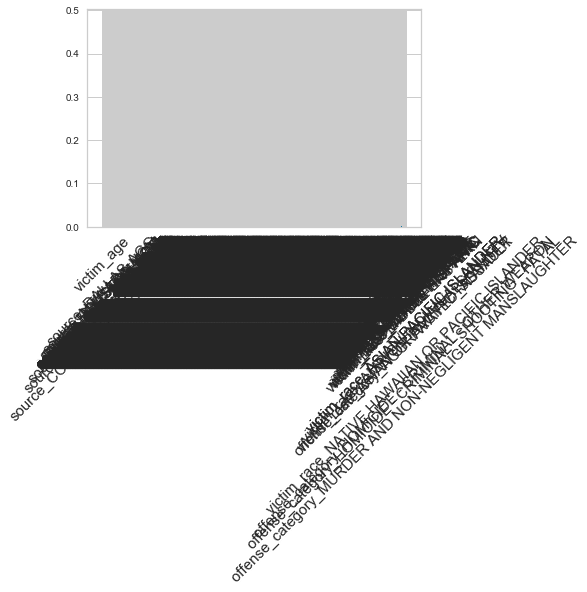

In [85]:
plt.bar(height=gbc.feature_importances_, x=X_train_sm.columns)
plt.xticks(rotation = 45, fontsize = 15)
plt.tight_layout()

In [89]:
plt.bar(height=max(gbc.feature_importances_), x=X_train_sm.columns)
plt.xticks(rotation = 45, fontsize = 15)
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11c616440> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11c89edd0> (for post_execute):


KeyboardInterrupt: 

In [82]:
max(gbc.feature_importances_)

0.47864208728848545

In [113]:
gbc.feature_importances_

array([5.96e-02, 9.04e-04, 9.87e-06, ..., 2.67e-02, 4.46e-08, 0.00e+00])

In [115]:
new_index = gbc.feature_importances_ 

In [122]:
new_index = new_index.reshape(5976,1)

In [118]:
X_train_sm.columns

Index(['victim_age', 'source_CHICAGO-HOM', 'source_COLORADO-SPRINGS-MAIN',
       'source_DALLAS-AGG', 'source_HOUSTON-AGG', 'source_HOUSTON-HOM',
       'source_LOS-ANGELES-MAIN', 'source_NEW-YORK-CITY-HOM',
       'source_NEWARK-HOM', 'occurred_date_1988-09-16',
       ...
       'victim_race_U', 'victim_race_UNKNOWN', 'victim_race_W',
       'victim_race_WHITE', 'victim_race_WHITE HISPANIC', 'victim_sex_F',
       'victim_sex_FEMALE', 'victim_sex_M', 'victim_sex_MALE',
       'victim_sex_OTHER'],
      dtype='object', length=5976)

In [129]:
feature_names = pd.DataFrame(new_index)

In [133]:
feature_names = feature_names.set_index(X_train_sm.columns)

In [142]:
top_10_features = feature_names[feature_names[0] > .007]

In [152]:
top_10_features.sort_values(by = 0, ascending = True, inplace = True)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
top_10_features

,0
victim_race_WHITE,0.007408
offense_category_MURDER,0.007687
victim_race_HISPANIC,0.010571
source_HOUSTON-AGG,0.011606
victim_race_BLACK,0.012685
victim_sex_M,0.026699
victim_sex_F,0.050030
victim_age,0.059593
firearm_ind_Y,0.279258
source_LOS-ANGELES-MAIN,0.478642


AttributeError: 'GradientBoostingClassifier' object has no attribute 'coef_'

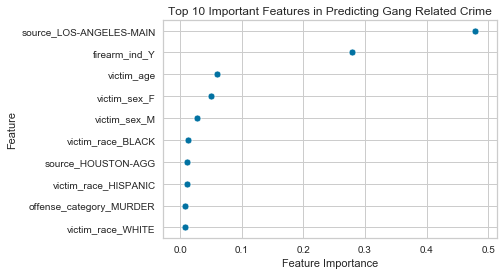

In [156]:
sns.scatterplot(y = top_10_features.index, x = top_10_features[0])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Predicting Gang Related Crime')
plt.show()

In [102]:
from sklearn.metrics import confusion_matrix

In [107]:
X_train_sm

,victim_age,source_CHICAGO-HOM,source_COLORADO-SPRINGS-MAIN,source_DALLAS-AGG,source_HOUSTON-AGG,source_HOUSTON-HOM,source_LOS-ANGELES-MAIN,source_NEW-YORK-CITY-HOM,source_NEWARK-HOM,occurred_date_1988-09-16,...,victim_race_U,victim_race_UNKNOWN,victim_race_W,victim_race_WHITE,victim_race_WHITE HISPANIC,victim_sex_F,victim_sex_FEMALE,victim_sex_M,victim_sex_MALE,victim_sex_OTHER
0,19.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,25.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,48.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,20.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158666,20.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
158667,15.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158668,44.548615,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
y_train_sm.replace(to_replace = 'Y', value = 1, inplace = True)
y_train_sm.replace(to_replace = 'N', value = 0, inplace = True)
y_train_sm

0         1
1         0
2         0
3         0
4         0
         ..
158665    1
158666    1
158667    1
158668    1
158669    1
Name: gang_activity_ind, Length: 158670, dtype: int64

In [111]:
y_pred = gbc.predict(X_train_sm)

In [112]:
pcf = confusion_matrix(y_train_sm, y_pred)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# from sklearn.metrics, we use confusion_matrix and pass in the y_test and y hat; saving the result as cm.
# this will calculate how many true positives, true negatives, false positives, and false negatives there are.
cm = confusion_matrix(y_tesat,y_pred)

# because we're aiming to predict a value over/under 50K, we set the classes appropriately. 
classes = ['<=50K', '>50K']

In [99]:
from sklearn.metrics import plot_confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
#         if normalized, convert the confusion matrix to a float, then divide the top quadrants by the summation of the top row
#           and bottom quadrants by the summation of the bottom row to get a percentage for each quadrant.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

#     Set the plt with the confusion matrix, the colors defined (in this case default)
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # <- What is interpolation?
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

# what is all of this?
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

TypeError: plot_confusion_matrix() missing 2 required positional arguments: 'X' and 'y_true'

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


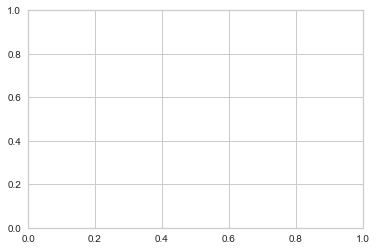

In [93]:
cm = ConfusionMatrix(gbc, classes=[0,1])

In [91]:
cm.fit(X_train_sm, y_train_sm)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x2b51cec50>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x181151cd0>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

In [92]:
cm.score(X_train_sm, y_train_sm)

KeyboardInterrupt: 

In [ ]:
cm.show()

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(X_train_sm, y_train_sm)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
lr.predict(X_train_sm)

array(['Y', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [62]:
lr.score(X_train_sm, y_train_sm)

0.8056784521333585

In [75]:
clf = RandomForestClassifier(n_estimators= 500, 
                             criterion= 'gini', 
                             max_depth= 4, 
                             max_features= 'auto',
                             oob_score= True)

In [76]:
# Took to long to run, we need more processing power

# clf.fit(X_train_sm, y_train_sm)
# clf.score(X_train_sm, y_train_sm)

KeyboardInterrupt: 

In [ ]:
# need more processing power, took to long to run

# clf.oob_score_